# CSII 2024 Exercise 02: Diagonalization, Modal Analysis, Controllability and Observability

Welcome to the third CS2 notebook! In the last notebook we introduced two models, the _aircraft model_ and the _CS2 Bot_. In this notebook we will futher invesigate the aircraftmodel. The objectives are:

1) Use diagonalization to compute the modal decomposition of the aircraft model,
2) Visualize the different modes of the system,
3) Show if the model is controllable and/or observable.

To start, run the following cell to install the necessary modules and import the libraries.

In [2]:
try:
    import control as ct
except ImportError:
    %pip install control

In [187]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## Exercise 1: Modal Decomposition of the Aircraft Model

To perform the modal decomposition of the System we need to find a coordinate transformation $\tilde{x} = T^{-1} x$, that diagonalizes the A-matrix of the state-space model.

$$
\begin{cases}
\dot{x} &= Ax + Bu, \\
y &= Cx + Du.
\end{cases}
\quad \Rightarrow \quad
\begin{cases}
T\dot{x} &= AT\tilde{x} + Bu, \\
y &= CT\tilde{x} + Du.
\end{cases}
$$

If we multiply the equations by $T^{-1}$ we find a definition for the state-space model in modal coordinates:

$$
\begin{align}
\dot{\tilde{x}} &= (T^{-1}AT)\tilde{x} + (T^{-1}B)u \\
y &= (CT)\tilde{x} + Du
\end{align}
$$

And we can define the new matrices as follows: 
$\quad \tilde{A} = T^{-1}AT, \quad \tilde{B} = T^{-1}B, \quad\tilde{C} = CT, \quad \tilde{D} = D$

Remember that this coordinate transform does not change the structural properties of the system and the time response is exactly the same!

### 1.1 Define Aircraft Model
For this exercise we use the aircraft model intruduced in the __Introductory Notebook 2__. Feel free to look at this notebook again if you need to. Run the next cell to define the longitudinal dynamics of the aircraft.

In [49]:
# Given matrices A and B
A = np.array([
    [-15.5801,  4.7122, -38.7221,  0.0000],
    [ -0.5257, -0.0166,   2.3501, -9.7847],
    [  4.4044, -1.5325, -18.1615, -0.7044],
    [  0.9974,  0.0000,   0.0000,  0.0000]
])

B = np.array([
    [-421.2001],
    [   1.3231],
    [ -17.3812],
    [   0.0000]
])

# Define the output matrix C and the feedthrough matrix D
C = np.array([0, 0, 0, 1])
D = 0

# Create a state-space system using the matrices A, B, C, and D
sys = ct.ss(A, B, C, D)

### 1.2 Diagonalization of the A-Matrix

To diagonalize the A-matrx we can perfom following transformation: $\tilde{x} = Vx, \quad \tilde{A} =\Lambda = V^{-1}AV$, where $V$ is the matrix containing the eigenvectors of $A$ as columns and $\Lambda = diag(\lambda_1, ..., \lambda_n)$ with the eigenvalues $\lambda_i$ of A.

Try to implement the function below that calculates the eigenvalues and the eigenvectors of a matrix. <br>
__Hints:__
1) Use `np.linalg.eig()` to compute the eigenvalues and eigenvectors.
2) Use `np.linalg.inv()` to compute the inverse of a matrix.
3) Matrix mulpiplication in python is done with `A @ B`.



In [57]:
def diagonalize_system(A: np.array, B: np.array, C: np.array, D:np.array) -> (np.array, np.array, np.array, np.array):
    """
    Diagonalizes a linear time-invariant system represented by its state-space matrices.

    Parameters:
    A (np.array): State matrix of the system.
    B (np.array): Input matrix of the system.
    C (np.array): Output matrix of the system.
    D (np.array): Feedthrough matrix of the system.

    Returns:
    A_tilde (np.array): Diagonalized state matrix.
    B_tilde (np.array): Diagonalized input matrix.
    C_tilde (np.array): Diagonalized output matrix.
    D_tilde (np.array): Diagonalized feedthrough matrix.
    """
    
    # TODO: replace the next line with your implementation
    eigenvalues, eigenvectors = None
    
    # Compute the transformed state-space representation
    # TODO: replace the next line with your implementation
    A_tilde = None
    B_tilde = None
    C_tilde = None
    D_tilde = None
    
    return A_tilde, B_tilde, C_tilde, D_tilde

In [61]:
def sol_diagonalize_system(A: np.array, B: np.array, C: np.array, D:np.array) -> (np.array, np.array, np.array, np.array):
    """
    Diagonalizes a linear time-invariant system represented by its state-space matrices.

    Parameters:
    A (np.array): State matrix of the system.
    B (np.array): Input matrix of the system.
    C (np.array): Output matrix of the system.
    D (np.array): Feedthrough matrix of the system.

    Returns:
    A_tilde (np.array): Diagonalized state matrix.
    B_tilde (np.array): Diagonalized input matrix.
    C_tilde (np.array): Diagonalized output matrix.
    D_tilde (np.array): Diagonalized feedthrough matrix.
    """
    
    # Compute the eigenvalues and eigenvectors of matrix A
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Compute the transformed state-space representation
    # The diagonal matrix A_tilde contains the eigenvalues of A
    A_tilde = np.diag(eigenvalues)
    
    # The input matrix B_tilde is obtained by transforming the input matrix B
    # using the inverse of the eigenvector matrix
    B_tilde = np.linalg.inv(eigenvectors) @ B
    
    # The output matrix C_tilde is obtained by transforming the output matrix C
    # using the eigenvector matrix
    C_tilde = C @ eigenvectors
    
    # The feedthrough matrix D_tilde remains the same
    D_tilde = D
    
    return A_tilde, B_tilde, C_tilde, D_tilde

You can run the following cell to test your implementation:

In [62]:
...

Ellipsis

In [201]:
def print_diagonalized_system(A_tilde, B_tilde, C_tilde, D_tilde):
    print("A_tilde =")
    print(np.around(A_tilde, decimals=2))
    print("B_tilde =")
    print(np.around(B_tilde, decimals=2))
    print("C_tilde =")
    print(np.around(C_tilde, decimals=2))
    print("D_tilde =")
    print(np.around(D_tilde, decimals=2))

print_diagonalized_system(*sol_diagonalize_system(A, B, C, D))

A_tilde =
[[-16.87+13.11j   0.   +0.j     0.   +0.j     0.   +0.j  ]
 [  0.   +0.j   -16.87-13.11j   0.   +0.j     0.   +0.j  ]
 [  0.   +0.j     0.   +0.j    -0.01 +1.76j   0.   +0.j  ]
 [  0.   +0.j     0.   +0.j     0.   +0.j    -0.01 -1.76j]]
B_tilde =
[[220.41 +6.27j]
 [220.41 -6.27j]
 [ -1.95-45.01j]
 [ -1.95+45.01j]]
C_tilde =
[[-0.88+1.02j -0.88-1.02j  2.08-0.71j  2.08+0.71j]]
D_tilde =
0


## Exercise 2: Modal Analysis

In this exercise we want to find the modes of the aircraft model and try to visualize it. to each eigenvalue of the system there is a corresponding eigenvector that fulfill $Av_i = \lambda_i v_i$. each of the eigenvectors define the shape of a mode in the system. 

Let's look at the eigenvalues again. When inspecting $\tilde{A}$ we find the four eigenvalues $\lambda_{sp} = -16.8739 \pm 13.1129j$ and $\lambda_{ph} = -0.0052 \pm 1.7644j$. It is worth noting that we have here two complex-conjugate pairs of eigenvalues (and also eigenvectors) and consequently we only have two different modes. In aviations these are called the __Short Period__ mode and the __Phugoid__ mode.

Since the eigenvalue defines how the amplitude of the mode evolves over time with $\tilde{x}_i(t) = e^{\lambda_it}\tilde{x}_i(0)$, we can conlude that the short period mode is a fast mode, i.e. it gets attenuated fast, and the phugoid is a slow mode and will be visible for a long time. 

### These function is not (yet) part of the notebook

In [202]:
def plot_eigenvec(eigenvec):
    """
    Plots the elements of an eigenvector in polar coordinates.

    Parameters:
    eigenvec (array-like): The eigenvector to be plotted.

    Returns:
    None

    Example:
    >>> eigenvector = [1+1j, 2-3j, -4+2j]
    >>> plot_eigenvec(eigenvector)
    """
    fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
    ax.set_title("Elements of eigenvector in Polar Coordinates")
    
    for i, element in enumerate(eigenvec):
        angle = np.angle(element)
        magnitude = np.abs(element)
        ax.annotate(
            "",
            xy=(angle, magnitude),
            xytext=(0, 0),
            arrowprops=dict(facecolor=f"C{i}", edgecolor=f"C{i}", arrowstyle="->", linewidth=2))
    plt.show()

In [ ]:
eigenvectors = np.linalg.eig(A)[1]
for i in range(len(eigenvectors)):
    plot_eigenvec(eigenvectors[:, i])

In [138]:
def compute_evolution_of_modal_coordinate(eigenvalue: complex, initial_condition: complex, time_vector: np.array) -> None:
    
    # Compute the eigenmode
    x_tilde = np.real(np.exp(eigenvalues[index] * time_vector) * x0[index])
    
    

In [150]:
def plot_shorperiod(eigenvalue: complex, initial_condition: complex) -> None:
    
    time_vector = np.linspace(0, 10, 1000)
    x_tilde = np.real(np.exp(eigenvalue * time_vector) * initial_condition)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(f"Eigenmode for eigenvalue {eigenvalue}")
    plt.plot(time_vector, x_tilde)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.axhline(0, color='black', lw=0.5)  # Horizontal line through the origin
    plt.show() 

In [151]:
def plot_eigenmode(mode: str, x_tilde: np.array) -> None:
    if mode == "sp":
        time_vector = np.linspace(0, 1, 1000)
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(f"Eigenmode for eigenvalue -16.87 \\pm 13.11j")
    elif mode == "ph":
        time_vector = np.linspace(0, 1000, 10000)
        fig, ax = plt.subplots(figsize=(20, 5))
        plt.title(f"Eigenmode for eigenvalue -0.0052 \\pm 1.76j")
    else:
        print("Invalid mode! Please use 'sp' for short period or 'ph' for phugoid.")
        return
    
    
    plt.plot(time_vector, x_tilde)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.axhline(0, color='black', lw=0.5)  # Horizontal line through the origin
    plt.show() 

In [ ]:
x_tilde_sp = np.real(np.exp(-16.87 * time_vector_short_period) * x0[0])
plot_eigenmode("sp", x_tilde_sp)

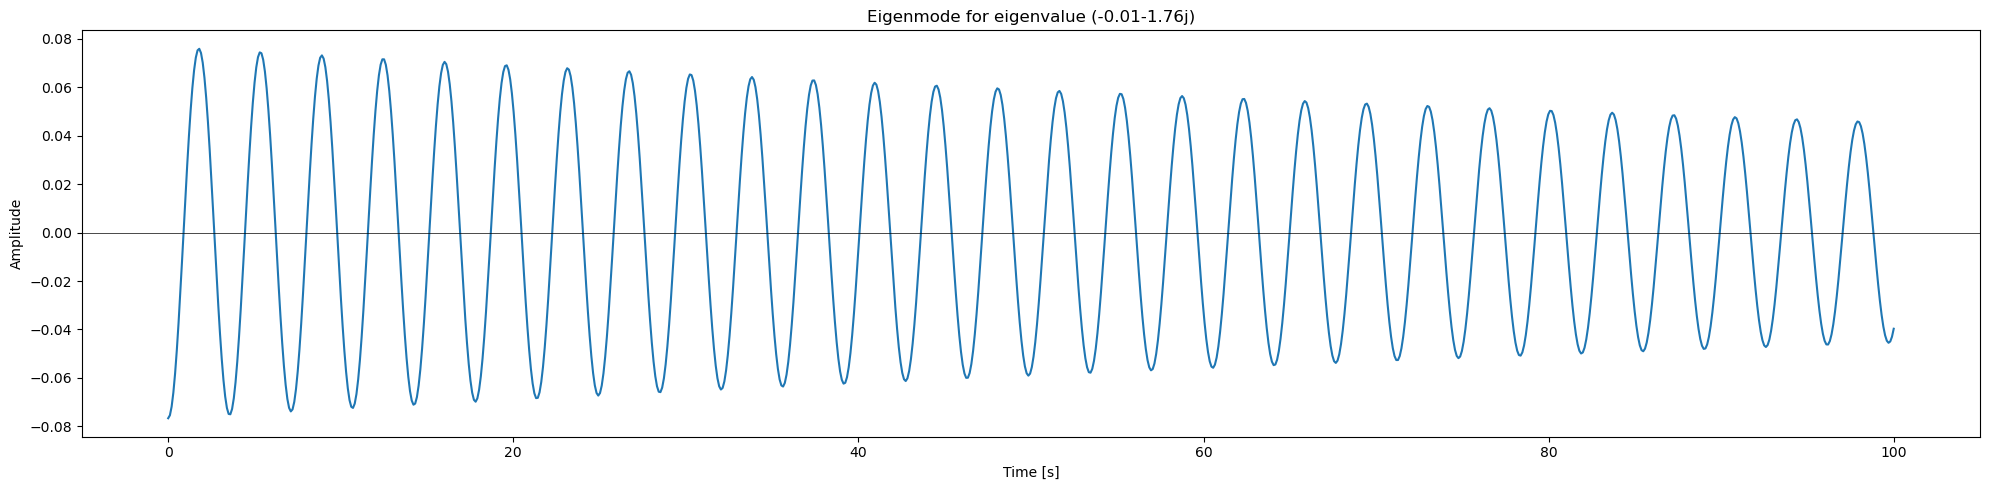

In [143]:
time_vector_phugoid = np.linspace(0, 100, 1000)
plot_eigenmode(3, eigenvalues, eigenvectors, x0, time_vector_phugoid)

In [82]:
# initial conditions
x0 = np.array([0, 0.1, 0, 0])
x0 = np.random.uniform(-0.1, 0.1, 4)

x_tilde = np.linalg.inv(eigenvectors) @ x0

print(x_tilde)

[0.02074155-0.12131907j 0.02074155+0.12131907j 0.0339711 -0.24853336j
 0.0339711 +0.24853336j]


c:\Users\vo_sc\anaconda3\envs\cs2\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\vo_sc\anaconda3\envs\cs2\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


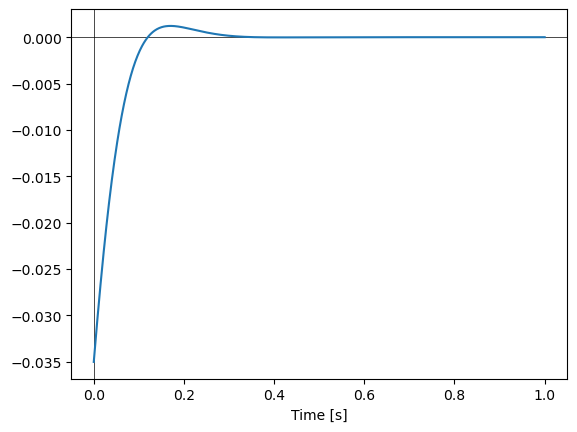

In [115]:
eigenvalues = np.linalg.eig(A)[0]
time = np.linspace(0, 1, 1000) # 10 sedonds, 1000 time points
x_tilde = np.exp(eigenvalues[0] * time) * x_tilde[0]

plt.axhline(0, color='black', lw=0.5)  # Horizontal line through the origin
plt.axvline(0, color='black', lw=0.5)  # Vertical line through the origin
plt.plot(time, x_tilde)
plt.xlabel('Time [s]')

plt.show()

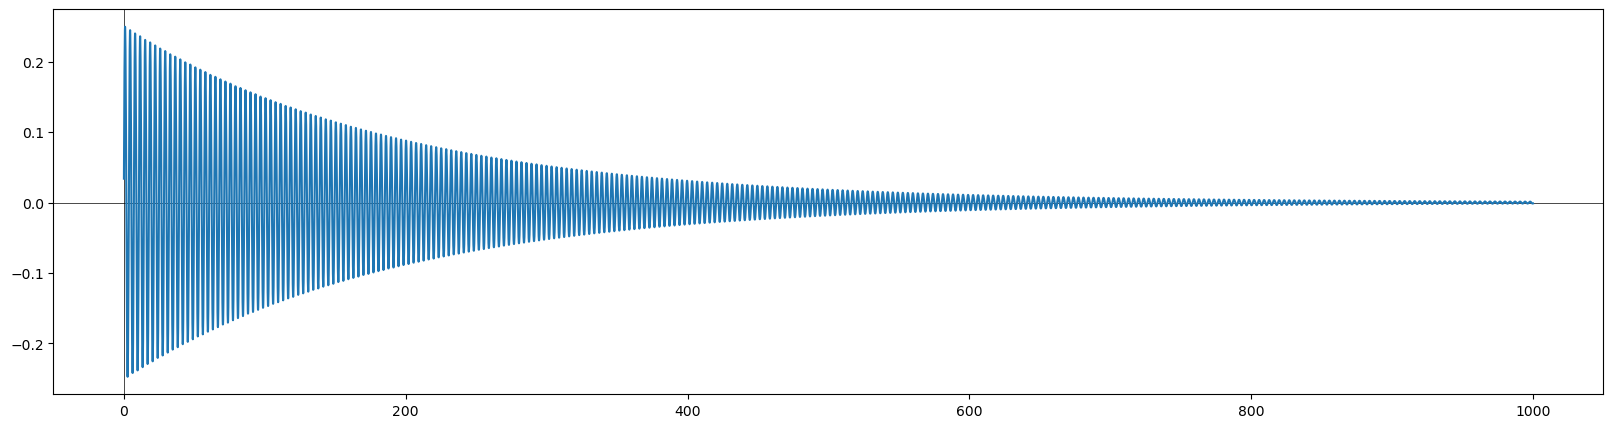

In [98]:
eigenvalues = np.linalg.eig(A)[0]
time = np.linspace(0, 1000, 10000) # 10 sedonds, 1000 time points
x_tilde_3 = np.exp(eigenvalues[2] * time) * x_tilde[2]

fig, ax = plt.subplots(figsize=(20, 5))
plt.axhline(0, color='black', lw=0.5)  # Horizontal line through the origin
plt.axvline(0, color='black', lw=0.5)  # Vertical line through the origin
plt.plot(time, x_tilde_3)

### 2.1 Short Period

In [204]:
eigenvalues, eigenvectors = np.linalg.eig(A)

[-0.9463  0.0107 -0.0303  0.0349]


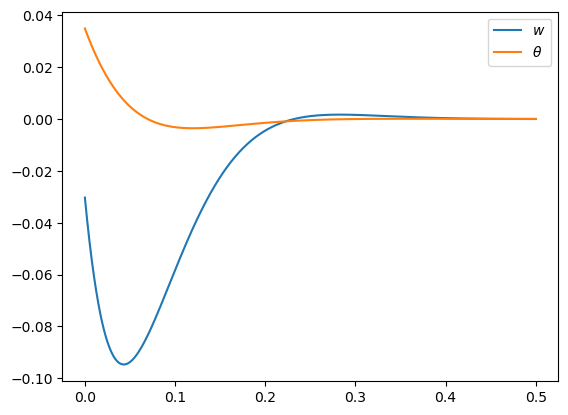

In [205]:
# Set the eigenvector for the short period mode as the initial condition
# Note: since the eigenvector is complex, we only take the real part
x0 = np.real(eigenvectors[:, 0])
print(x0.real)
# The mode is fast and the oscillations are damped, so we can use a smaller time vector
t = np.linspace(0, 0.5, 1000)  # 0.5 seconds, 1000 points

# Compute the state variables
response = ct.initial_response(sys, t, x0) # compute the initial response with initial conditions x0
states = response.states # extract the state variables
time = response.time # extract the time vector

# Now we plot the state variables
#plt.plot(time, states[1], label='$u$')
plt.plot(time, states[2], label='$w$')
plt.plot(time, states[3], label='$\\theta$')
plt.legend()
plt.show()

### 2.2 Phugoid Mode

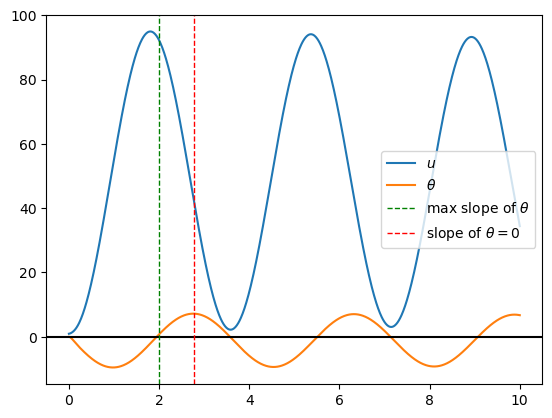

In [159]:
# Set initial conditions as the eigenvector corresponding to the phugoid mode
x0 = np.real(eigenvectors[:, 2])

t = np.linspace(0, 10, 1000)  # 10 seconds, 1000 points

# Compute the step response with initial conditions x0
response = ct.step_response(sys, t, x0)
x = response.states  # Extract the state variables

# Plot the state variables
plt.plot(t, x[1], label='$u$')
plt.plot(t, x[3], label='$\\theta$')

# Add vertical and horizontal lines
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=2, color='g', linestyle='--', label='max slope of $\\theta$', linewidth=1)
plt.axvline(x=2.77, color='r', linestyle='--', label='slope of $\\theta = 0$', linewidth=1)

plt.legend()
plt.show()

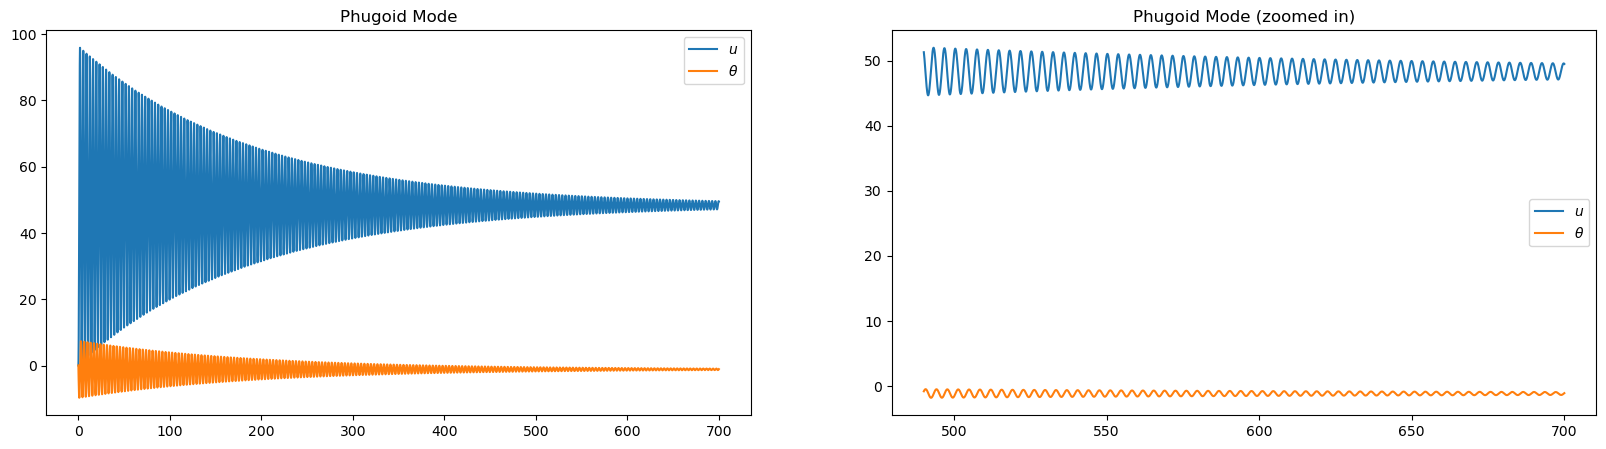

In [206]:
# Define the time vector
t = np.linspace(0, 700, 10000)  # 1000 seconds, 1000 points

# Compute the step response with initial conditions x0
response = ct.step_response(sys, t, x0)

# Extract the state variables and time vector from the response
states = response.states
time = response.time

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot the state variables in the first subplot
ax1.plot(time, states[1], label='$u$')
ax1.plot(time, states[3], label='$\\theta$')
ax1.set_title('Phugoid Mode')
ax1.legend()

# Plot the state variables in the second subplot (zoomed in)
ax2.plot(time[7000:], states[1, 7000:], label='$u$')
ax2.plot(time[7000:], states[3, 7000:], label='$\\theta$')
ax2.set_title('Phugoid Mode (zoomed in)')
ax2.legend()

# Display the figure
plt.show()

## Exercise 3: Controllability and Observability

In the last part of this notebook we want to show if the aircraft model is controllable (reachable) and/or observable. This is important if our model does not behave as we want to and we need to design a controller. To understand how we can change the behavior of the states trough our inputs, we need to asses the controllability and observability of our system.

Recall that in the lecture 2 the __reachability matrix__ $\mathcal{R}$ and the __observability matrix__ $\mathcal{O}$ were introduced:

$$
\mathcal{R} =
\begin{bmatrix} B & AB & A^2B & ... & A^{n-1}B \end{bmatrix},
\qquad
\mathcal{O} = \begin{bmatrix} C \\ CA \\ \vdots \\ CA^{n-1} \end{bmatrix}
$$

The system is fully controllable or observable if $rank(\mathcal{R}) = n$ or $rank(\mathcal{O}) = n$ respectively.


Try to implement the functions below that check if the system is controllable or observable.

Hints:
- use `A.shape[0]` to get the number of states $n$.
- use `np.linalg.matrix_power(M, i)` to calculate the matrix power $M^i$.
- use `M = np.hstack(M, v)` to append a columnvector $v$ to the matrix $M$.

In [167]:
def check_controllability(A: np.array, B: np.array) -> None:
    """
    Check the controllability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    B (np.array): The input matrix.

    Returns:
    None
    """
    
    # TODO: Get the number of columns in matrix A.
    n = None
    
    # TODO: Initialize the reachability matrix R with matrix B, since the first column of R is always B.
    R = None
    
    # Use a for loop to compute each column of the reachability matrix and append it to R.
    for i in range(1, n):  # Iterate from 1 to n-1.
        # TODO: Compute the i-th column of the reachability matrix and concatenate it horizontally to R.
        R = None
        
    # TODO: Compute the rank of the reachability matrix.
    rank = None
    
    if rank == A.shape[0]:
        print(f"The system is controllable with rank {rank}.")
    else:
        print(f"The system is not controllable with rank {rank}.")

In [168]:
def sol_check_controllability(A: np.array, B: np.array) -> None:
    """
    Check the controllability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    B (np.array): The input matrix.

    Returns:
    None
    """
    
    n = A.shape[0]  # Get the number of rows in matrix A.
    R = B  # Initialize the reachability matrix R with matrix B, since the first column of R is always B.
    
    for i in range(1, n):  # Iterate from 1 to n-1.
        # Calculate the reachability matrix for each power of A and concatenate it horizontally to R.
        R = np.hstack((R, np.linalg.matrix_power(A, i) @ B))
    
    rank = np.linalg.matrix_rank(controllability_matrix)
    if rank == A.shape[0]:
        print(f"The system is controllable with rank {rank}.")
    else:
        print(f"The system is not controllable with rank {rank}.")

In [ ]:
def check_observability(A: np.array, C: np.array) -> None:
    """
    Check the observability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    C (np.array): The output matrix.

    Returns:
    None
    """
    
    n = None  # Get the number of rows in matrix A.
    O = None  # Initialize the observability matrix O with matrix C, since the first row of O is always C.
    
    for i in range(1, n):  # Iterate from 1 to n-1.
        # Calculate the observability matrix for each power of A and concatenate it vertically to O.
        pass
    
    rank = np.linalg.matrix_rank(O)
    if rank == A.shape[0]:
        print(f"The system is observable with rank {rank}.")
    else:
        print(f"The system is not observable with rank {rank}.")

In [189]:
def sol_check_observability(A: np.array, C: np.array) -> None:
    """
    Check the observability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    C (np.array): The output matrix.

    Returns:
    None
    """
    
    n = A.shape[0]  # Get the number of rows in matrix A.
    O = C  # Initialize the observability matrix O with matrix C, since the first row of O is always C.
    
    for i in range(1, n):  # Iterate from 1 to n-1.
        # Calculate the observability matrix for each power of A and concatenate it vertically to O.
        O = np.vstack((O, C @ np.linalg.matrix_power(A, i)))
    
    rank = np.linalg.matrix_rank(O)
    if rank == A.shape[0]:
        print(f"The system is observable with rank {rank}.")
    else:
        print(f"The system is not observable with rank {rank}.")


#### __Additional Information__

the `control` module has the functions `ct.ctrb(A, B)` and `ct.obsv(A, C)` that compute the reachability and observability matrices directly.

Example:

In [194]:
# Compute the controllability matrix R using the ctrb() function from the control module
R = ct.ctrb(A, B)

# Calculate the rank of the controllability matrix R using the matrix_rank() function from numpy
rank_R = np.linalg.matrix_rank(R)

# Compute the observability matrix O using the obsv() function from the control module
O = ct.obsv(A, C)

# Calculate the rank of the observability matrix O using the matrix_rank() function from numpy
rank_O = np.linalg.matrix_rank(O)

# Print the controllability matrix R, observability matrix O, and their respective ranks
print("Controllability matrix R = \n", R)
print("Observability matrix O = \n", O)
print("Rank of controllability matrix R = ", rank_R)
print("Rank of observability matrix O = ", rank_O)

Controllability matrix R = 
 [[    -421.2001     7241.611    -52284.375  -1520898.7078]
 [       1.3231      180.5554    -3321.9729    97662.7502]
 [     -17.3812    -1541.4927    59909.9919 -1318333.4247]
 [       0.         -420.105      7222.7828   -52148.4357]]
Observability matrix O = 
 [[     1.          2.          3.          4.    ]
 [     0.5713      0.0815    -88.5064    -21.6826]
 [  -420.3876    138.3268   1585.4786     61.5465]
 [ 13521.4303  -4412.9925 -12191.298   -2470.2972]]
Rank of controllability matrix R =  4
Rank of observability matrix O =  4
